In [2]:
! pip install -q kaggle

In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"raghavbang","key":"01a5f64920ebee70a8b1199ac0d7b220"}'}

In [4]:
 ! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                         title                                             size  lastUpdated          downloadCount  
----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  
vishnuvarthanrao/windows-store                              Windows Store                                     93KB  2020-07-07 12:29:07            957  
moezabid/zillow-all-homes-data                              Zillow All Homes Data                              5MB  2020-07-18 11:44:48            711  
mrmorj/restaurant-recommendation-challenge                  Restaurant Recommendation Challenge              534MB  2020-07-18 16:25:04            723  
mrgeislinger/bart-ridership                                 BART Ridership                                   325MB  2020-07-09 22:28:07            179  
vzrenggamani/hanacaraka                                     Aksara Jawa / Hanacara

In [7]:
!kaggle datasets download -d ashishjangra27/gender-recognition-200k-images-celeba

 99% 1.31G/1.32G [00:46<00:00, 18.4MB/s]
100% 1.32G/1.32G [00:46<00:00, 30.4MB/s]


In [8]:
! mkdir dataset

In [9]:
! unzip /content/gender-recognition-200k-images-celeba.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/Dataset/Validation/Male/189675.jpg  
  inflating: dataset/Dataset/Validation/Male/189676.jpg  
  inflating: dataset/Dataset/Validation/Male/189679.jpg  
  inflating: dataset/Dataset/Validation/Male/189681.jpg  
  inflating: dataset/Dataset/Validation/Male/189684.jpg  
  inflating: dataset/Dataset/Validation/Male/189688.jpg  
  inflating: dataset/Dataset/Validation/Male/189689.jpg  
  inflating: dataset/Dataset/Validation/Male/189691.jpg  
  inflating: dataset/Dataset/Validation/Male/189692.jpg  
  inflating: dataset/Dataset/Validation/Male/189693.jpg  
  inflating: dataset/Dataset/Validation/Male/189694.jpg  
  inflating: dataset/Dataset/Validation/Male/189695.jpg  
  inflating: dataset/Dataset/Validation/Male/189696.jpg  
  inflating: dataset/Dataset/Validation/Male/189697.jpg  
  inflating: dataset/Dataset/Validation/Male/189698.jpg  
  inflating: dataset/Dataset/Validation/Male/189702.jpg  
  inflating: dataset/

In [18]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [13]:

train_datagen = ImageDataGenerator(rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


test_datagen = ImageDataGenerator( rescale = 1.0/255)

train_generator = train_datagen.flow_from_directory("/content/dataset/Dataset/Train/",
                                                    batch_size =256 ,
                                                    class_mode = 'binary', 
                                                    target_size = (64, 64))     

validation_generator =  test_datagen.flow_from_directory( "/content/dataset/Dataset/Validation/",
                                                          batch_size  = 256,
                                                          class_mode  = 'binary', 
                                                          target_size = (64, 64))


Found 160000 images belonging to 2 classes.
Found 22598 images belonging to 2 classes.


In [20]:

 
model = tf.keras.models.Sequential([
    # 1st conv
  tf.keras.layers.Conv2D(96, (11,11),strides=(4,4), activation='relu', input_shape=(64, 64, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2,2)),
    # 2nd conv
  tf.keras.layers.Conv2D(256, (11,11),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
     # 3rd conv
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    # 4th conv
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    # 5th Conv
  tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2, 2)),
  # To Flatten layer
  tf.keras.layers.Flatten(),
  # To FC layer 1
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  #To FC layer 2
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1, activation='sigmoid')
  ])
model.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    loss='binary_crossentropy',
    metrics=['acc']
   )

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 14, 14, 96)        34944     
_________________________________________________________________
batch_normalization_15 (Batc (None, 14, 14, 96)        384       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 96)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 7, 7, 256)         2973952   
_________________________________________________________________
batch_normalization_16 (Batc (None, 7, 7, 256)         1024      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 384)         885120    
_________________________________________________________________
batch_normalization_17 (Batc (None, 7, 7, 384)        

In [24]:

hist = model.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                     epochs=50)

Epoch 1/50
625/625 [==============================] - 308s 492ms/step - loss: 0.3808 - acc: 0.8303 - val_loss: 0.5269 - val_acc: 0.7040
Epoch 2/50
625/625 [==============================] - 307s 491ms/step - loss: 0.3130 - acc: 0.8656 - val_loss: 0.3043 - val_acc: 0.8639
Epoch 3/50
625/625 [==============================] - 305s 487ms/step - loss: 0.2829 - acc: 0.8808 - val_loss: 0.2364 - val_acc: 0.8981
Epoch 4/50
625/625 [==============================] - 306s 489ms/step - loss: 0.2611 - acc: 0.8908 - val_loss: 0.2036 - val_acc: 0.9139
Epoch 5/50
625/625 [==============================] - 306s 489ms/step - loss: 0.2486 - acc: 0.8962 - val_loss: 0.2085 - val_acc: 0.9140
Epoch 6/50
625/625 [==============================] - 305s 488ms/step - loss: 0.2372 - acc: 0.9023 - val_loss: 0.2522 - val_acc: 0.8915
Epoch 7/50
625/625 [==============================] - 306s 489ms/step - loss: 0.2314 - acc: 0.9030 - val_loss: 0.1854 - val_acc: 0.9249
Epoch 8/50
625/625 [============================

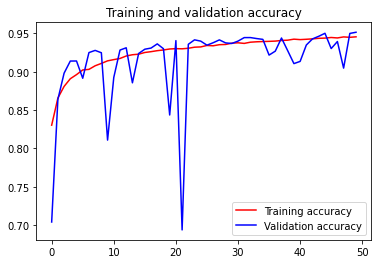

<Figure size 432x288 with 0 Axes>

In [29]:
import matplotlib.pyplot as plt
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()



[0.]
 is a female


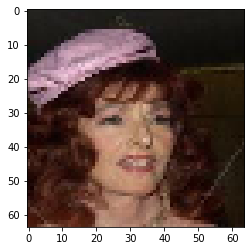

In [30]:
import numpy as np

from keras.preprocessing import image
# predicting images
path = "/content/dataset/Dataset/Test/Female/160001.jpg"
img = image.load_img(path, target_size=(64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=1)
print(classes[0])
if classes[0]>0.5:
    print("is a man")
else:
    print( " is a female")
plt.imshow(img)

[1.]
is a man


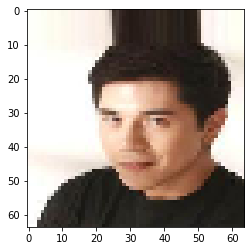

In [31]:
import numpy as np

from keras.preprocessing import image
# predicting images
path = "/content/dataset/Dataset/Test/Male/160002.jpg"
img = image.load_img(path, target_size=(64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=1)
print(classes[0])
if classes[0]>0.5:
    print("is a man")
else:
    print( " is a female")
plt.imshow(img)